# STC TV Watch Time Forecast - Task 2

In [86]:
# importing the libraries 
import pandas as pd     
import pyxlsb        
import numpy as np     
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prophet import Prophet

## Data Loading and Preprocessing:

In [87]:
df = pd.read_excel("stc TV Data Set_T2.xlsx", sheet_name="Sheet1") 
df

,Unnamed: 0,date_,Total_watch_time_in_houres
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444
...,...,...,...
81,81,2018-04-24,652.625278
82,82,2018-04-25,650.428889
83,83,2018-04-26,675.184444
84,84,2018-04-27,601.738056


In [88]:
# dropping the index col
df = df.drop(columns=['Unnamed: 0'])

In [89]:
df

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444
...,...,...
81,2018-04-24,652.625278
82,2018-04-25,650.428889
83,2018-04-26,675.184444
84,2018-04-27,601.738056


In [90]:
# checking the data shape
df.shape

(86, 2)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date_                       86 non-null     datetime64[ns]
 1   Total_watch_time_in_houres  86 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [92]:
# describe the numeric values in the dataset
dataframe.describe()

,Unnamed: 0,date_,Total_watch_time_in_houres
count,86.000000,86,86.000000
mean,42.500000,2018-02-28 17:01:23.720930304,780.817926
min,0.000000,2018-01-01 00:00:00,562.124722
25%,21.250000,2018-01-30 06:00:00,707.709653
50%,42.500000,2018-02-28 12:00:00,763.181389
75%,63.750000,2018-03-29 18:00:00,840.985278
max,85.000000,2018-04-30 00:00:00,1123.551944
std,24.969982,NaN,122.992002


In [93]:
# check if any column has null value in the dataset
df.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [94]:
number_of_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {number_of_duplicates}")

Number of duplicate rows: 0


In [95]:
# setting the date as index
df.set_index('date_', inplace=True)

In [96]:
# display the dataframe after setting the date as index
df.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


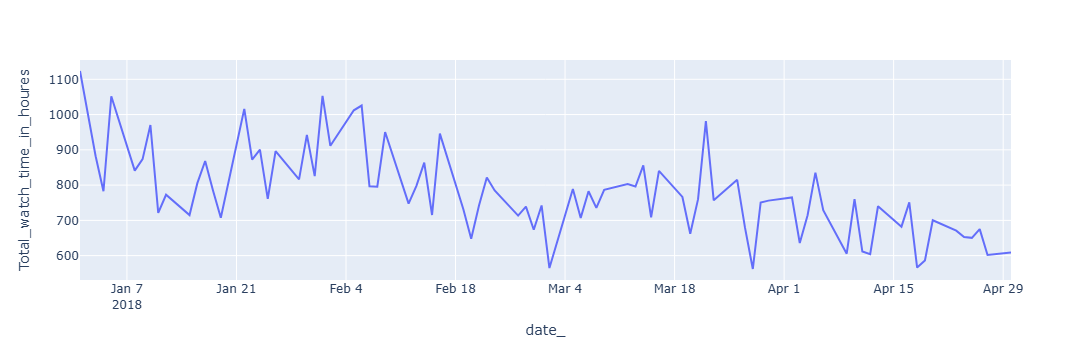

In [97]:
# showing the df
fig = px.line(df,  y="Total_watch_time_in_houres")
fig.show()

## Prophet Forecast Model:

In [121]:
# reset the index to make 'date_' a regular column, then rename cols for Prophet
prophet_df = df.reset_index() 
prophet_df.rename(columns={'date_': 'ds', 'Total_watch_time_in_houres': 'y'}, inplace=True)

# display the first few rows of the prepared dataFrame to check
print("DataFrame prepared for Prophet:")
print(prophet_df.head())

DataFrame prepared for Prophet:
          ds            y
0 2018-01-01  1123.551944
1 2018-01-02  1000.129722
2 2018-01-03   881.924444
3 2018-01-04   782.669444
4 2018-01-05  1051.939444


In [124]:
# initialize the Prophet model
model = Prophet(weekly_seasonality=True, daily_seasonality=False)

# fitting the model to the historical data
model.fit(prophet_df)
print(" Prophet model fitted.")

04:28:43 - cmdstanpy - INFO - Chain [1] start processing
04:28:44 - cmdstanpy - INFO - Chain [1] done processing


 Prophet model fitted.


In [125]:
# lets ask prophet for the next 60 days forecasting
future_dates_df = model.make_future_dataframe(periods=60, freq='D')
print("glimpse of the future dates this will predict for (last 5)")
print(future_dates_df.tail())

glimpse of the future dates this will predict for (last 5)
            ds
141 2018-06-25
142 2018-06-26
143 2018-06-27
144 2018-06-28
145 2018-06-29


In [126]:
forecast_df = model.predict(future_dates_df)

# this will show us the predictions for the last 5, for yhat, yhat_lower and yhat_upper
print("\n--- Our model's forecast (last 5 predictions) ---")
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


--- Our model's forecast (last 5 predictions) ---
            ds        yhat  yhat_lower  yhat_upper
141 2018-06-25  527.043849  413.735021  648.039805
142 2018-06-26  514.130000  396.479769  628.265898
143 2018-06-27  495.176921  370.959695  617.496177
144 2018-06-28  496.827140  383.419295  619.706719
145 2018-06-29  522.821623  408.016160  649.189014


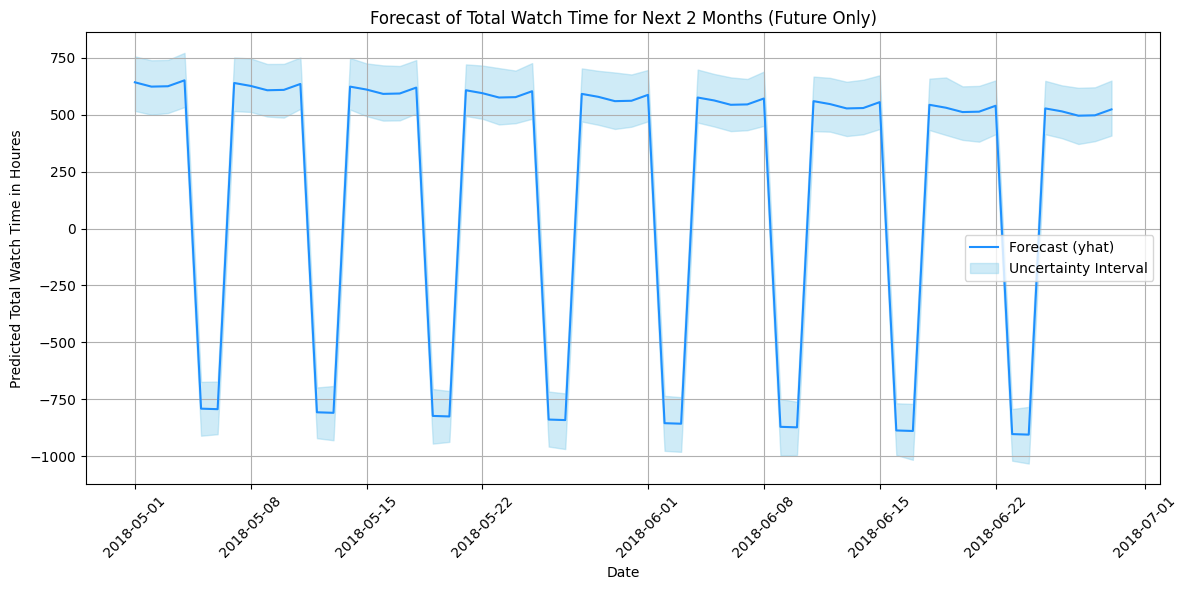

In [127]:
# plotting only the forecast for the next two months
last_historical_date = prophet_df['ds'].max()

future_forecast_only_df = forecast_df[forecast_df['ds'] > last_historical_date]
plt.figure(figsize=(12, 6))

# plotting (yhat)
plt.plot(future_forecast_only_df['ds'], future_forecast_only_df['yhat'], label='Forecast (yhat)', color='dodgerblue')

# plotting the (yhat_lower and yhat_upper)
plt.fill_between(future_forecast_only_df['ds'],
                 future_forecast_only_df['yhat_lower'],
                 future_forecast_only_df['yhat_upper'],
                 color='skyblue',  
                 alpha=0.4,
                 label='Uncertainty Interval')

plt.title('Forecast of Total Watch Time for Next 2 Months (Future Only)')
plt.xlabel('Date')
plt.ylabel('Predicted Total Watch Time in Houres')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()

In [128]:
# output of prophet model.predict() method
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,508.021877,815.021865,1038.639378,508.021877,508.021877,417.696219,417.696219,417.696219,417.696219,417.696219,417.696219,0.0,0.0,0.0,925.718096
1,2018-01-02,505.743738,795.077005,1031.168430,505.743738,505.743738,407.060508,407.060508,407.060508,407.060508,407.060508,407.060508,0.0,0.0,0.0,912.804246
2,2018-01-03,503.465600,788.703616,1020.192727,503.465600,503.465600,390.385568,390.385568,390.385568,390.385568,390.385568,390.385568,0.0,0.0,0.0,893.851168
3,2018-01-04,501.187461,779.673757,1013.906885,501.187461,501.187461,394.313926,394.313926,394.313926,394.313926,394.313926,394.313926,0.0,0.0,0.0,895.501387
4,2018-01-05,498.909323,808.070004,1038.082595,498.909323,498.909323,422.586547,422.586547,422.586547,422.586547,422.586547,422.586547,0.0,0.0,0.0,921.495869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2018-06-25,109.347630,413.735021,648.039805,109.347613,109.347651,417.696219,417.696219,417.696219,417.696219,417.696219,417.696219,0.0,0.0,0.0,527.043849
142,2018-06-26,107.069492,396.479769,628.265898,107.069473,107.069513,407.060508,407.060508,407.060508,407.060508,407.060508,407.060508,0.0,0.0,0.0,514.130000
143,2018-06-27,104.791353,370.959695,617.496177,104.791334,104.791375,390.385568,390.385568,390.385568,390.385568,390.385568,390.385568,0.0,0.0,0.0,495.176921
144,2018-06-28,102.513215,383.419295,619.706719,102.513195,102.513237,394.313926,394.313926,394.313926,394.313926,394.313926,394.313926,0.0,0.0,0.0,496.827140


 Plotting Historical Data and Future Forecast


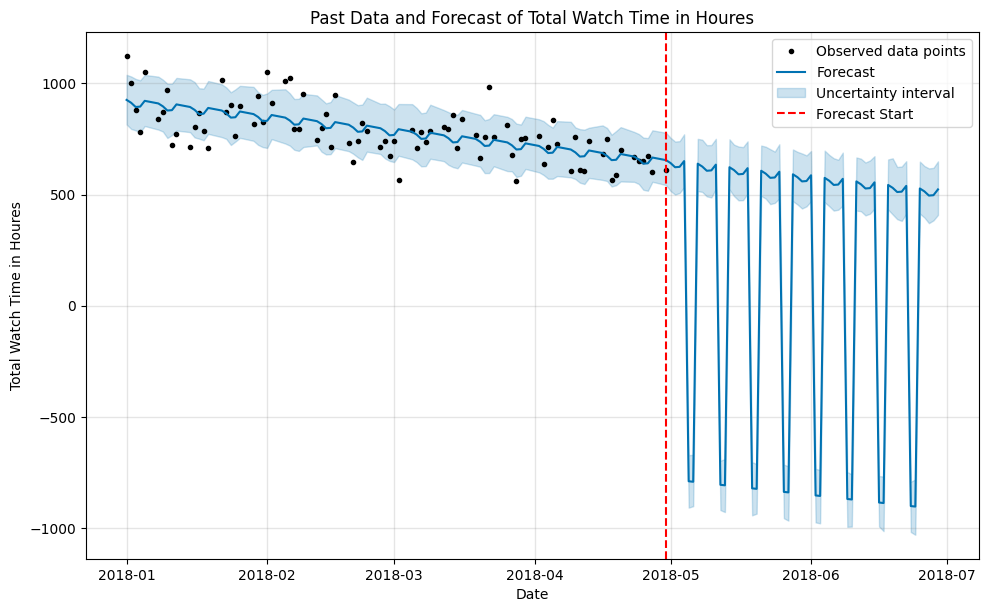

In [131]:
# combining the past and future forecast data in a plot
if forecast_df is not None:
    print(" Plotting Historical Data and Future Forecast")
    fig_combined = model.plot(forecast_df)
    
    plt.title('Past Data and Forecast of Total Watch Time in Houres')
    plt.xlabel('Date')
    plt.ylabel('Total Watch Time in Houres')
    
    if not prophet_df.empty: 
        last_historical_date = prophet_df['ds'].max()
        plt.axvline(x=last_historical_date, color='red', linestyle='--', label='Forecast Start')
        plt.legend() 

plt.show()

In [132]:
print(forecast_df['yhat'])

0      925.718096
1      912.804246
2      893.851168
3      895.501387
4      921.495869
          ...    
141    527.043849
142    514.130000
143    495.176921
144    496.827140
145    522.821623
Name: yhat, Length: 146, dtype: float64


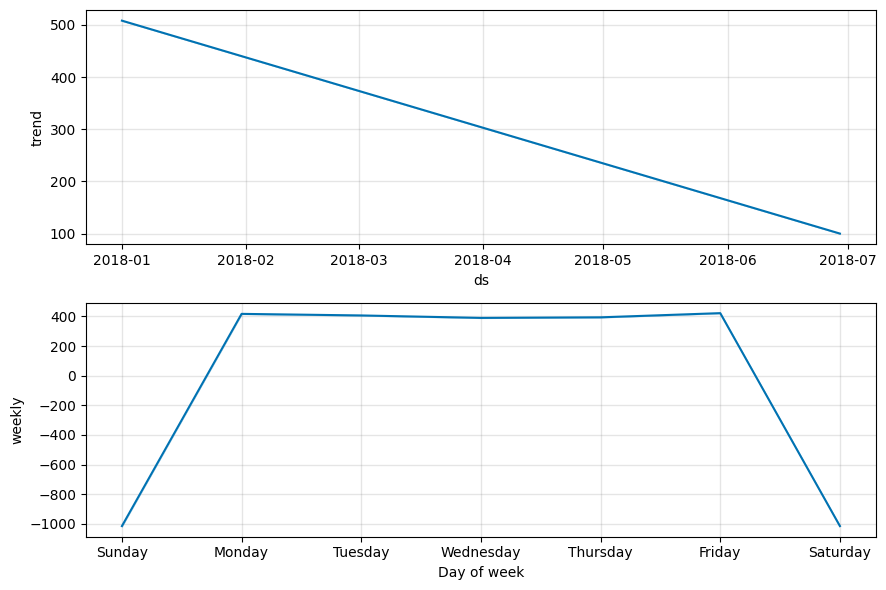

In [135]:
# lets break down the forecast to see what patterns the model got (like overall trend and weekly habits)
try:
    fig2 = model.plot_components(forecast_df)
    plt.show()
except Exception as e:
    print(f"Could not plot components: {e}")


In [138]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,508.021877,815.021865,1038.639378,508.021877,508.021877,417.696219,417.696219,417.696219,417.696219,417.696219,417.696219,0.0,0.0,0.0,925.718096
1,2018-01-02,505.743738,795.077005,1031.168430,505.743738,505.743738,407.060508,407.060508,407.060508,407.060508,407.060508,407.060508,0.0,0.0,0.0,912.804246
2,2018-01-03,503.465600,788.703616,1020.192727,503.465600,503.465600,390.385568,390.385568,390.385568,390.385568,390.385568,390.385568,0.0,0.0,0.0,893.851168
3,2018-01-04,501.187461,779.673757,1013.906885,501.187461,501.187461,394.313926,394.313926,394.313926,394.313926,394.313926,394.313926,0.0,0.0,0.0,895.501387
4,2018-01-05,498.909323,808.070004,1038.082595,498.909323,498.909323,422.586547,422.586547,422.586547,422.586547,422.586547,422.586547,0.0,0.0,0.0,921.495869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2018-06-25,109.347630,413.735021,648.039805,109.347613,109.347651,417.696219,417.696219,417.696219,417.696219,417.696219,417.696219,0.0,0.0,0.0,527.043849
142,2018-06-26,107.069492,396.479769,628.265898,107.069473,107.069513,407.060508,407.060508,407.060508,407.060508,407.060508,407.060508,0.0,0.0,0.0,514.130000
143,2018-06-27,104.791353,370.959695,617.496177,104.791334,104.791375,390.385568,390.385568,390.385568,390.385568,390.385568,390.385568,0.0,0.0,0.0,495.176921
144,2018-06-28,102.513215,383.419295,619.706719,102.513195,102.513237,394.313926,394.313926,394.313926,394.313926,394.313926,394.313926,0.0,0.0,0.0,496.827140


In [140]:
df.to_csv("cleaned_stc_tv_data2.csv", index=False)
print("Cleaned data saved to: cleaned_stc_tv_data2.csv")

Cleaned data saved to: cleaned_stc_tv_data2.csv
